# Visualization of some Onnettomuudet Data

Collect information from the SQL database tables and analyse data is it contains some interesting features.

In [1]:
# Needed libraries
import pandas as pd
import numpy as np
import pyodbc
import sqlalchemy
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

In [2]:
# Needed Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Connection to SQL Server database

In [3]:
# Database
Database = 'Onnettomuudet'

#conn = 'DRIVER={ODBC Driver 17 for SQL Server};Server=localhost\SQLEXPRESS;Database=Onnettomuudet;Trusted_Connection=Yes;'
conn = 'DRIVER={ODBC Driver 17 for SQL Server};server=FUJITSU-PC\SQLEXPRESS;database=Onnettomuudet;trusted_connection=Yes;'
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": conn})
# Create engine between python and database
engine = create_engine(connection_url)

#### Read data from SQL Server database to dataframe

In [4]:
# Query of numeric data for correlation analysis
sqlcommand_1 = '''SELECT
    o.Vuosi,
    Kk AS Kuukausi,
    Vkpv AS Viikonpäivä,
    Tunti,
    Vakavuusko AS Vakavuus,
    os.Kuollut AS Kuolleita,
    os.Loukk AS Loukkaantuneita,
    os.Oslaji AS Osallisen_laji,
    Onluokka AS Onnett_Luokka,
    Ontyyppi AS Onnett_Tyyppi,
    Onnpaikka AS Onnett_Paikka,
    Nopraj AS Nopeusrajoitus,
    t.Noplaji AS NopRaj_Laji,
    t.Risteys AS Risteävien_lkm,
    t.Talvhoitlk AS Talvihoitoluokka,
    t.Kvl AS Vrk_keskim_lm,
    t.Raskaskvl AS Vrk_keskim_raskas_lm,
    Pinta AS Tienpinta,
    Valoisuus,
    Sää,
    Lämpötila,
    a.Maakunta,
    Väestö,
    a.Kunta
FROM
    Onnettomuudet o
INNER JOIN Alueet a 
    ON o.alue_id = a.alue_id
INNER JOIN Tieomin t
    ON o.tieomin_id = t.tieomin_id AND
    o.Vuosi = t.Vuosi
INNER JOIN Osalliset os
    ON o.Onnett_id = os.Onnett_id
INNER JOIN Väestö v
    ON o.Vuosi = v.Vuosi
WHERE
    a.Maakuntsel = v.Maakuntsel
GROUP BY 
    o.Vuosi,
    Kk,
    Vkpv,
    Tunti,
    Vakavuusko,
    os.Kuollut,
    os.Loukk,
    os.Oslaji,
    Onluokka,
    Ontyyppi,
    Onnpaikka,
    Nopraj,
    t.Noplaji,
    t.Risteys,
    t.Talvhoitlk,
    t.Kvl,
    t.Raskaskvl,
    Pinta,
    Valoisuus,
    Sää,
    Lämpötila,
    a.Maakunta,
    Väestö,
    a.Kunta'''

In [4]:
# Query data for accident development and their severity
sqlcommand_2 = '''SELECT
    Vuosi,
    Maakuntsel,
    COUNT(Onnett_id) lkm_onnett, 
    SUM(Kuolleet) lkm_kuolleet,
    SUM(Loukkaant) lkm_loukkaant
FROM
    Onnettomuudet o
INNER JOIN Alueet a
        ON o.alue_id = a.alue_id
GROUP BY 
    Vuosi,
    Maakuntsel;'''

In [91]:
# Query data for ratio of severity to total accident
sqlcommand_3 = '''SELECT
    Vuosi,
    Onnett_id, 
    Vakavuus
FROM
    Onnettomuudet
GROUP BY 
    Vuosi,
    Onnett_id,
    Vakavuus;'''

In [14]:
# Query data for detailed analysis of feature combinations
sqlcommand_4 = '''SELECT
    o.Vuosi,
    Kk AS Kuukausi,
    Vkpv AS Viikonpäivä,
    Tunti,
    Vakavuus,
    os.Kuollut AS Kuolleita,
    os.Loukk AS Loukkaantuneita,
    os.Oslajisel AS Osallisen_laji,
    Onlksel AS Onnett_Luokka,
    Ontyypsel AS Onnett_Tyyppi,
    Onnpaiksel AS Onnett_Paikka,
    Nopraj AS Nopeusrajoitus,
    t.Noplajisel AS NopRaj_Laji,
    t.Risteys AS Risteävien_lkm,
    t.Risteyssel AS Risteys_Laji,
    t.Kvl AS Vrk_keskim_lm,
    t.Raskaskvl AS Vrk_keskim_raskas_lm,
    Pintasel AS Tienpinta,
    Valsel AS Valoisuus,
    Sääsel AS Sää,
    Lämpötila
FROM
    Onnettomuudet o
INNER JOIN Tieomin t
    ON o.tieomin_id = t.tieomin_id AND
    o.Vuosi = t.Vuosi
INNER JOIN Osalliset os
    ON o.Onnett_id = os.Onnett_id
GROUP BY 
    o.Vuosi,
    Kk,
    Vkpv,
    Tunti,
    Vakavuus,
    os.Kuollut,
    os.Loukk,
    os.Oslajisel,
    Onlksel,
    Ontyypsel,
    Onnpaiksel,
    Nopraj,
    t.Noplajisel,
    t.Risteys,
    t.Risteyssel,
    t.Kvl,
    t.Raskaskvl,
    Pintasel,
    Valsel,
    Sääsel,
    Lämpötila;'''

In [5]:
query = pd.read_sql_query(sqlcommand_1,con=engine)
df_num = pd.DataFrame(query)

In [6]:
df_num

,Vuosi,Kuukausi,Viikonpäivä,Tunti,Vakavuus,Kuolleita,Loukkaantuneita,Osallisen_laji,Onnett_Luokka,Onnett_Tyyppi,...,Talvihoitoluokka,Vrk_keskim_lm,Vrk_keskim_raskas_lm,Tienpinta,Valoisuus,Sää,Lämpötila,Maakunta,Väestö,Kunta
0,2005,1,Keskiviikko,-1,0,0.0,0.0,30,1,80,...,1,20998.0,2232.0,2,4,5,1.0,1,1439400,91
1,2005,1,Keskiviikko,1,0,0.0,0.0,30,5,21,...,3,1766.0,156.0,6,4,2,0.0,2,453745,738
2,2005,1,Keskiviikko,1,0,0.0,0.0,30,11,90,...,5,203.0,11.0,4,3,2,-5.0,4,229389,50
3,2005,1,Keskiviikko,1,0,0.0,0.0,32,10,90,...,5,1136.0,57.0,6,3,1,-3.0,10,152171,768
4,2005,1,Keskiviikko,1,0,0.0,0.0,70,10,90,...,5,1136.0,57.0,6,3,1,-3.0,10,152171,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543401,2021,11,Torstai,23,0,0.0,0.0,30,1,80,...,2,5135.0,137.0,2,4,2,2.0,19,176665,583
543402,2021,11,Torstai,23,0,0.0,0.0,30,2,13,...,7,146.0,12.0,2,4,2,0.0,5,170577,981
543403,2021,11,Torstai,23,0,0.0,0.0,30,6,6,...,5,724.0,37.0,1,4,2,1.0,2,481403,704
543404,2021,11,Torstai,23,0,0.0,0.0,30,10,90,...,1,31534.0,1216.0,6,3,5,-20.0,19,176665,890


In [7]:
# Replace 'Viikonpäivä' with numeric value (also empty values NaN to nullable int)
df_num['Viikonpäivä'] = df_num['Viikonpäivä'].replace(
                        ['Maanantai','Tiistai','Keskiviikko','Torstai','Perjantai','Lauantai','Sunnuntai','Ei arvoa'],
                        [1,2,3,4,5,6,7,''])
df_num['Viikonpäivä'] = pd.to_numeric(df_num['Viikonpäivä'], errors='coerce').convert_dtypes()

In [8]:
df_num

,Vuosi,Kuukausi,Viikonpäivä,Tunti,Vakavuus,Kuolleita,Loukkaantuneita,Osallisen_laji,Onnett_Luokka,Onnett_Tyyppi,...,Talvihoitoluokka,Vrk_keskim_lm,Vrk_keskim_raskas_lm,Tienpinta,Valoisuus,Sää,Lämpötila,Maakunta,Väestö,Kunta
0,2005,1,3,-1,0,0.0,0.0,30,1,80,...,1,20998.0,2232.0,2,4,5,1.0,1,1439400,91
1,2005,1,3,1,0,0.0,0.0,30,5,21,...,3,1766.0,156.0,6,4,2,0.0,2,453745,738
2,2005,1,3,1,0,0.0,0.0,30,11,90,...,5,203.0,11.0,4,3,2,-5.0,4,229389,50
3,2005,1,3,1,0,0.0,0.0,32,10,90,...,5,1136.0,57.0,6,3,1,-3.0,10,152171,768
4,2005,1,3,1,0,0.0,0.0,70,10,90,...,5,1136.0,57.0,6,3,1,-3.0,10,152171,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543401,2021,11,4,23,0,0.0,0.0,30,1,80,...,2,5135.0,137.0,2,4,2,2.0,19,176665,583
543402,2021,11,4,23,0,0.0,0.0,30,2,13,...,7,146.0,12.0,2,4,2,0.0,5,170577,981
543403,2021,11,4,23,0,0.0,0.0,30,6,6,...,5,724.0,37.0,1,4,2,1.0,2,481403,704
543404,2021,11,4,23,0,0.0,0.0,30,10,90,...,1,31534.0,1216.0,6,3,5,-20.0,19,176665,890


### Visualize Correlation Heatmap

In [9]:
# Drop columns whose value appears in another column 'Vakavuus'
df_heat = df_num.drop(['Kuolleita','Loukkaantuneita'], axis=1)

In [10]:
df_heat.corr()

,Vuosi,Kuukausi,Viikonpäivä,Tunti,Vakavuus,Osallisen_laji,Onnett_Luokka,Onnett_Tyyppi,Onnett_Paikka,Nopeusrajoitus,...,Talvihoitoluokka,Vrk_keskim_lm,Vrk_keskim_raskas_lm,Tienpinta,Valoisuus,Sää,Lämpötila,Maakunta,Väestö,Kunta
Vuosi,1.000000,-0.039186,-0.014547,0.006695,0.080631,-0.078237,-0.002856,-0.057802,0.047002,-0.148506,...,-0.186560,0.054898,0.021039,-0.105257,-0.012933,-0.096211,0.048422,0.084596,0.074888,-0.027808
Kuukausi,-0.039186,1.000000,0.013245,0.024652,0.002378,0.074999,0.093482,0.089826,-0.015178,0.070184,...,0.060164,-0.032249,-0.027754,-0.200113,0.141060,0.017955,0.175222,0.005968,0.036610,0.022154
Viikonpäivä,-0.014547,0.013245,1.000000,0.012613,-0.005423,0.030635,-0.013027,0.082650,-0.017585,0.053857,...,0.047879,-0.033717,-0.028094,-0.012247,0.073046,-0.005568,0.007215,0.027321,0.002260,0.005631
Tunti,0.006695,0.024652,0.012613,1.000000,0.021051,0.001228,0.040781,-0.030717,0.001030,-0.010760,...,-0.004467,-0.017482,-0.019522,-0.022519,0.124496,0.003250,0.059556,0.003006,-0.013456,0.005170
Vakavuus,0.080631,0.002378,-0.005423,0.021051,1.000000,-0.273449,-0.147545,-0.196438,0.040408,-0.053928,...,-0.042036,-0.004503,-0.012503,-0.004137,-0.080141,0.033620,0.126087,0.008889,-0.000522,-0.017097
Osallisen_laji,-0.078237,0.074999,0.030635,0.001228,-0.273449,1.000000,0.296701,0.320646,-0.124294,0.326106,...,0.220548,-0.059940,-0.039149,-0.079282,0.144141,-0.073031,-0.069309,0.076799,0.071554,0.053814
Onnett_Luokka,-0.002856,0.093482,-0.013027,0.040781,-0.147545,0.296701,1.000000,0.413086,0.046949,0.024355,...,-0.034586,-0.053577,-0.033150,-0.215211,0.052573,-0.152569,0.046630,-0.050652,0.002597,0.032968
Onnett_Tyyppi,-0.057802,0.089826,0.082650,-0.030717,-0.196438,0.320646,0.413086,1.000000,0.003239,0.184773,...,0.189093,-0.204856,-0.174898,-0.106136,0.165726,-0.099686,-0.040582,0.039582,0.011033,0.055446
Onnett_Paikka,0.047002,-0.015178,-0.017585,0.001030,0.040408,-0.124294,0.046949,0.003239,1.000000,-0.220725,...,-0.156063,-0.004346,-0.011317,-0.010640,-0.045366,0.019321,0.044747,-0.048662,0.003846,-0.062229
Nopeusrajoitus,-0.148506,0.070184,0.053857,-0.010760,-0.053928,0.326106,0.024355,0.184773,-0.220725,1.000000,...,0.469626,0.159439,0.233066,-0.032940,0.126537,-0.006561,-0.019218,0.286285,0.179005,0.060714


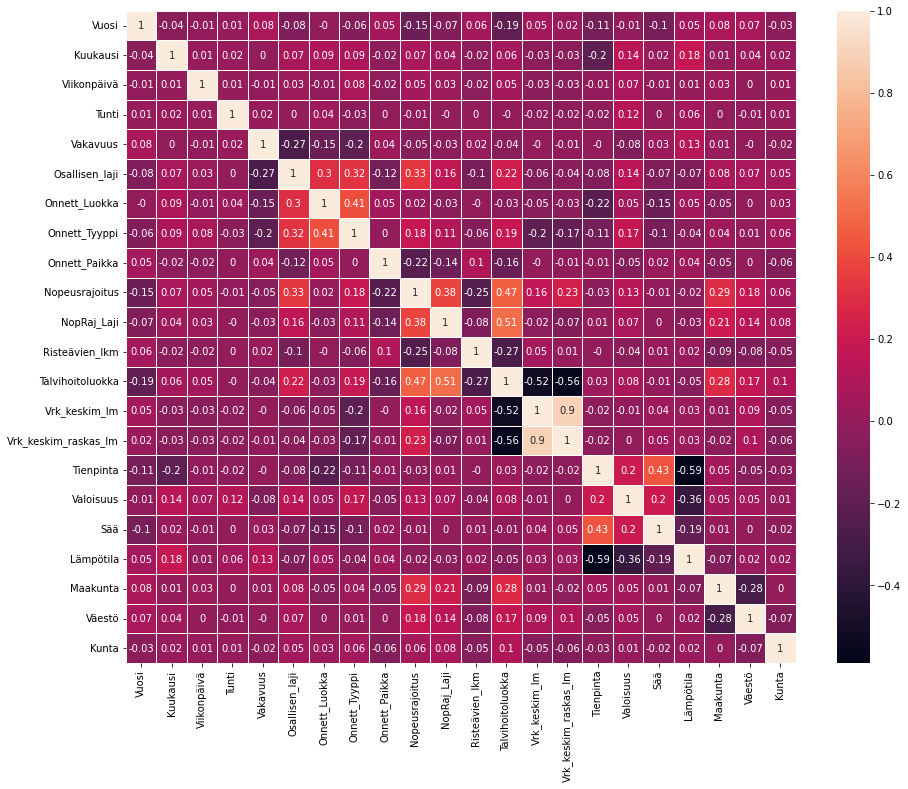

In [11]:
fig,ax = plt.subplots(figsize=(15,12))
data = df_heat.corr().round(2)
ax = sns.heatmap(data, linewidth=0.5, annot=True)
plt.show()

#### Analysing

Some dependecies between:
- Vakavuus with Lämpötila, Osallisen laji, Onnettomuustyyppi and -luokka
- Osallisen laji with Onnettomuustyyppi and -luokka, Valoisuus, Talvihoitoluokka/Nopeusrajoitus
- Onnettomuusluokka with Sää, Tienpinta
- Onnettomuustyyppi with Valoisuus, Talvihoitoluokka/Nopeusrajoitus (last two appears to be dependent each other) and Vuorokauden keskimääräiset liikennemäärät

Although there are no clear features that affect Vakavuus (severity), these feature combinations can be visualized in more details.

### Visualize accident development and their severity by years

In [5]:
query = pd.read_sql_query(sqlcommand_2,con=engine)
df_acc = pd.DataFrame(query)

In [6]:
df_acc

,Vuosi,Maakuntsel,lkm_onnett,lkm_kuolleet,lkm_loukkaant
0,2010,Kainuu,424,2,108
1,2013,Etelä-Karjala,200,8,81
2,2007,Pirkanmaa,1106,18,281
3,2006,Kymenlaakso,386,12,115
4,2020,Kymenlaakso,51,0,25
...,...,...,...,...,...
309,2019,Pohjanmaa,355,4,70
310,2011,Varsinais-Suomi,1780,23,358
311,2008,Satakunta,1071,7,256
312,2014,Keski-Suomi,600,13,174


In [19]:
df_onn = df_acc.loc[:,['Vuosi','lkm_onnett','lkm_kuolleet','lkm_loukkaant']]
df_onn = df_onn.groupby('Vuosi').sum()

In [20]:
df_onn

,lkm_onnett,lkm_kuolleet,lkm_loukkaant
Vuosi,,,
2005,16598,289,4252
2006,16645,251,4574
2007,16903,286,4960
2008,17266,224,4572
2009,30961,270,7635
2010,33814,272,7645
2011,33203,291,7899
2012,32812,254,7046
2013,29719,254,6625


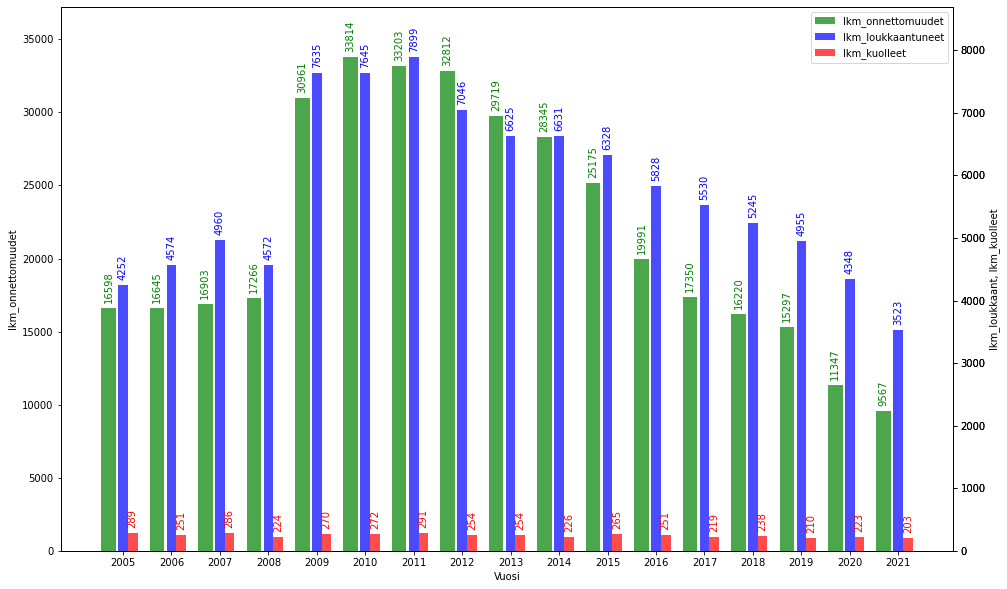

In [57]:
fig,ax = plt.subplots(figsize=(16,10))
labels = df_onn.index.tolist()

x = np.arange(len(labels))
ax2 = ax.twinx()
ax3 = ax.twinx()
width = 0.2

b1 = ax.bar(x-1.5*width,df_onn['lkm_onnett'], width=1.5*width, color='green', label='lkm_onnettomuudet', alpha=0.7)
b2 = ax2.bar(x, df_onn['lkm_loukkaant'], width=width, color='blue', label='lkm_loukkaantuneet', alpha=0.7)
b3 = ax3.bar(x+width, df_onn['lkm_kuolleet'], width=width, color='red', label='lkm_kuolleet', alpha=0.7)

lgns = [b1,b2,b3]
ax.legend(handles=lgns, loc='best')
for bars in ax.containers:
    ax.bar_label(bars, color='green', padding=5, rotation=90)
for bars in ax2.containers:
    ax2.bar_label(bars, color='blue', padding=5, rotation=90)
for bars in ax3.containers:
    ax3.bar_label(bars, color='red', padding=5, rotation=90)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Vuosi')
ax.set_ylabel('lkm_onnettomuudet')
ax2.set_ylabel('lkm_loukkaant, lkm_kuolleet')
ax.set_ylim(0,1.1*df_onn['lkm_onnett'].max())
ax2.set_ylim(0,1.1*df_onn['lkm_loukkaant'].max())
ax3.set_ylim(0,1.1*df_onn['lkm_loukkaant'].max())
ax2.grid(False)
plt.show()

#### Analysing

### Visualize ratio of severity to total accident by years

In [127]:
query = pd.read_sql_query(sqlcommand_3,con=engine)
df_ptg = pd.DataFrame(query)

In [128]:
df_ptg

,Vuosi,Onnett_id,Vakavuus
0,2009,6422405,Ei henkilövahinkoja
1,2011,6422406,Ei henkilövahinkoja
2,2010,6422407,Ei henkilövahinkoja
3,2010,6422408,Ei henkilövahinkoja
4,2011,6422409,Ei henkilövahinkoja
...,...,...,...
371208,2021,10211230,Loukkaantumiseen johtanut
371209,2021,10211231,Ei henkilövahinkoja
371210,2021,10211232,Loukkaantumiseen johtanut
371211,2021,10211233,Ei henkilövahinkoja


In [129]:
df_ptg = pd.get_dummies(df_ptg,columns=['Vakavuus'])

In [163]:
#df_ptg

In [131]:
df_ptg = df_ptg.groupby('Vuosi').sum()

In [162]:
#df_ptg

In [133]:
df_ptg.rename(columns = {'Vakavuus_Ei henkilövahinkoja':'Ei_vah',
                         'Vakavuus_Kuolemaan johtanut':'Kuol',
                         'Vakavuus_Loukkaantumiseen johtanut':'Loukk'}, inplace = True)
df_ptg['Total'] = df_ptg.apply(lambda row: row.Ei_vah + row.Kuol + row.Loukk, axis=1)
df_ptg = df_ptg.drop(['Onnett_id'], axis=1)

In [144]:
df_ptg.reset_index(inplace = True, drop = False)

In [160]:
#df_ptg

In [137]:
ptg_ei_vah = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Ei_vah[i] / df_ptg.Total[i]) * 100
    ptg_ei_vah.append(round(pct,2))
df_ptg['ptg_ei_vah'] = ptg_ei_vah

ptg_loukk = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Loukk[i] / df_ptg.Total[i]) * 100
    ptg_loukk.append(round(pct,2))
df_ptg['ptg_loukk'] = ptg_loukk

ptg_kuol = []
for i in range(df_ptg.shape[0]):
    pct = (df_ptg.Kuol[i] / df_ptg.Total[i]) * 100
    ptg_kuol.append(round(pct,2))
df_ptg['ptg_kuol'] = ptg_kuol

In [161]:
#df_ptg

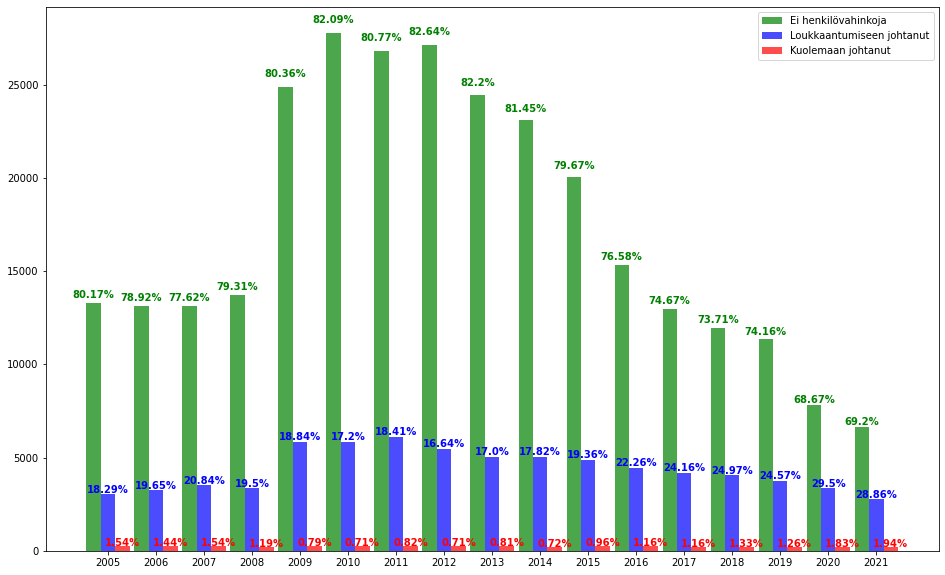

In [168]:
 # depict illustration
fig,ax = plt.subplots(figsize=(16,10))
labels = df_ptg.Vuosi.tolist()

x = np.arange(len(labels))
width = 0.3

b1 = ax.bar(x-width,df_ptg.Ei_vah, width=width, color='green', label='Ei henkilövahinkoja', alpha=0.7)
b2 = ax.bar(x,df_ptg.Loukk, width=width, color='blue', label='Loukkaantumiseen johtanut', alpha=0.7)
b3 = ax.bar(x+width,df_ptg.Kuol, width=width, color='red', label='Kuolemaan johtanut', alpha=0.7)

lgns = [b1,b2,b3]
ax.legend(handles=lgns, loc='best')

i = 0
for p in b1:
    w1 = p.get_width()
    h1 = p.get_height()
    x1, y1 = p.get_xy()
    plt.text(x1+w1/2, y1+h1*1.02, str(df_ptg.ptg_ei_vah[i])+'%', ha='center', color='green', weight='bold')
    i+=1
j = 0
for q in b2:
    w2 = q.get_width()
    h2 = q.get_height()
    x2, y2 = q.get_xy()
    plt.text(x2+w2/2, y2+h2*1.02, str(df_ptg.ptg_loukk[j])+'%', ha='center', color='blue', weight='bold')
    j+=1
k = 0
for r in b3:
    w3 = r.get_width()
    h3 = r.get_height()
    x3, y3 = r.get_xy()
    plt.text(x3+w3/2, y3+h3*1.02, str(df_ptg.ptg_kuol[k])+'%', ha='center', color='red', weight='bold')
    k+=1
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Vuosi')
ax.set_ylabel('lkm_onnettomuudet')
plt.show()

#### Analysing

### Visualize more detailed analysis of feature combinations

- Vakavuus with Lämpötila, Osallisen laji, Onnettomuustyyppi and -luokka
- Osallisen laji with Onnettomuustyyppi and -luokka, Valoisuus, Talvihoitoluokka/Nopeusrajoitus
- Onnettomuusluokka with Sää, Tienpinta
- Onnettomuustyyppi with Valoisuus, Talvihoitoluokka/Nopeusrajoitus and Vuorokauden keskimääräiset liikennemäärät

In [15]:
query = pd.read_sql_query(sqlcommand_4,con=engine)
df_det = pd.DataFrame(query)

In [42]:
df_det

,Vuosi,Kuukausi,Viikonpäivä,Tunti,Vakavuus,Kuolleita,Loukkaantuneita,Osallisen_laji,Onnett_Luokka,Onnett_Tyyppi,...,Nopeusrajoitus,NopRaj_Laji,Risteävien_lkm,Risteys_Laji,Vrk_keskim_lm,Vrk_keskim_raskas_lm,Tienpinta,Valoisuus,Sää,Lämpötila
0,2005,1,Keskiviikko,-1,Ei henkilövahinkoja,0.0,0.0,henkilöauto,yksittäisonnettomuus,suistuminen oikealle suoralla,...,80,tiekohtainen rajoitus,0,linjaonnettomuus,20998.0,2232.0,"paljas, märkä",tie valaistu,lumisade,1.0
1,2005,1,Keskiviikko,1,Ei henkilövahinkoja,0.0,0.0,henkilöauto,kohtaamisonnettomuus,kohtaaminen kaarteessa,...,40,tiekohtainen rajoitus,0,linjaonnettomuus,1766.0,156.0,jäinen,tie valaistu,pilvipouta,0.0
2,2005,1,Keskiviikko,1,Ei henkilövahinkoja,0.0,0.0,henkilöauto,peuraonnettomuus,eläinonnettomuus,...,80,Ei arvoa,0,linjaonnettomuus,203.0,11.0,luminen,pimeä (valaisematon),pilvipouta,-5.0
3,2005,1,Keskiviikko,1,Ei henkilövahinkoja,0.0,0.0,hirvi,hirvionnettomuus,eläinonnettomuus,...,80,Ei arvoa,0,linjaonnettomuus,1136.0,57.0,jäinen,pimeä (valaisematon),kirkas,-3.0
4,2005,1,Keskiviikko,1,Ei henkilövahinkoja,0.0,0.0,kuorma-auto,hirvionnettomuus,eläinonnettomuus,...,80,Ei arvoa,0,linjaonnettomuus,1136.0,57.0,jäinen,pimeä (valaisematon),kirkas,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543319,2021,11,Torstai,23,Ei henkilövahinkoja,0.0,0.0,henkilöauto,hirvionnettomuus,eläinonnettomuus,...,80,paikallinen rajoitus,0,linjaonnettomuus,31534.0,1216.0,jäinen,pimeä (valaisematon),lumisade,-20.0
543320,2021,11,Torstai,23,Ei henkilövahinkoja,0.0,0.0,henkilöauto,kääntymisonnettomuus,muu törmäys käännyttäessä vasemmalle,...,70,yleisrajoitus taajaman ulkopuolella,0,linjaonnettomuus,146.0,12.0,"paljas, märkä",tie valaistu,pilvipouta,0.0
543321,2021,11,Torstai,23,Ei henkilövahinkoja,0.0,0.0,henkilöauto,peräänajo-onnettomuus,peräänajo jarruttavaan ajoneuvoon,...,50,paikallinen rajoitus,0,linjaonnettomuus,724.0,37.0,"paljas, kuiva",tie valaistu,pilvipouta,1.0
543322,2021,11,Torstai,23,Ei henkilövahinkoja,0.0,0.0,henkilöauto,yksittäisonnettomuus,suistuminen oikealle suoralla,...,60,Ei arvoa,4,liikennevalot,5135.0,137.0,"paljas, märkä",tie valaistu,pilvipouta,2.0


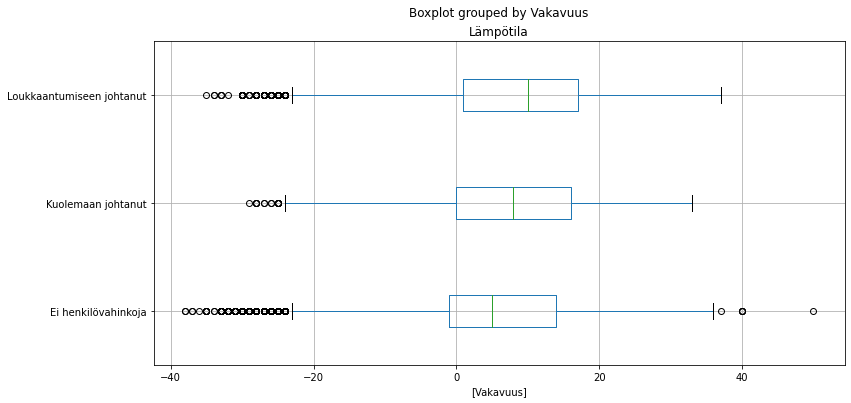

In [84]:
# Vakavuus depencies from Lämpötila deviation
df_box = df_det[['Vakavuus','Lämpötila']].copy()

df_box.boxplot(by = 'Vakavuus', vert = False, figsize=(12,6))

plt.show()

In [74]:
df_map = df_det[['Vakavuus','Osallisen_laji','Onnett_Luokka','Onnett_Tyyppi']].copy()

In [81]:
#df_map

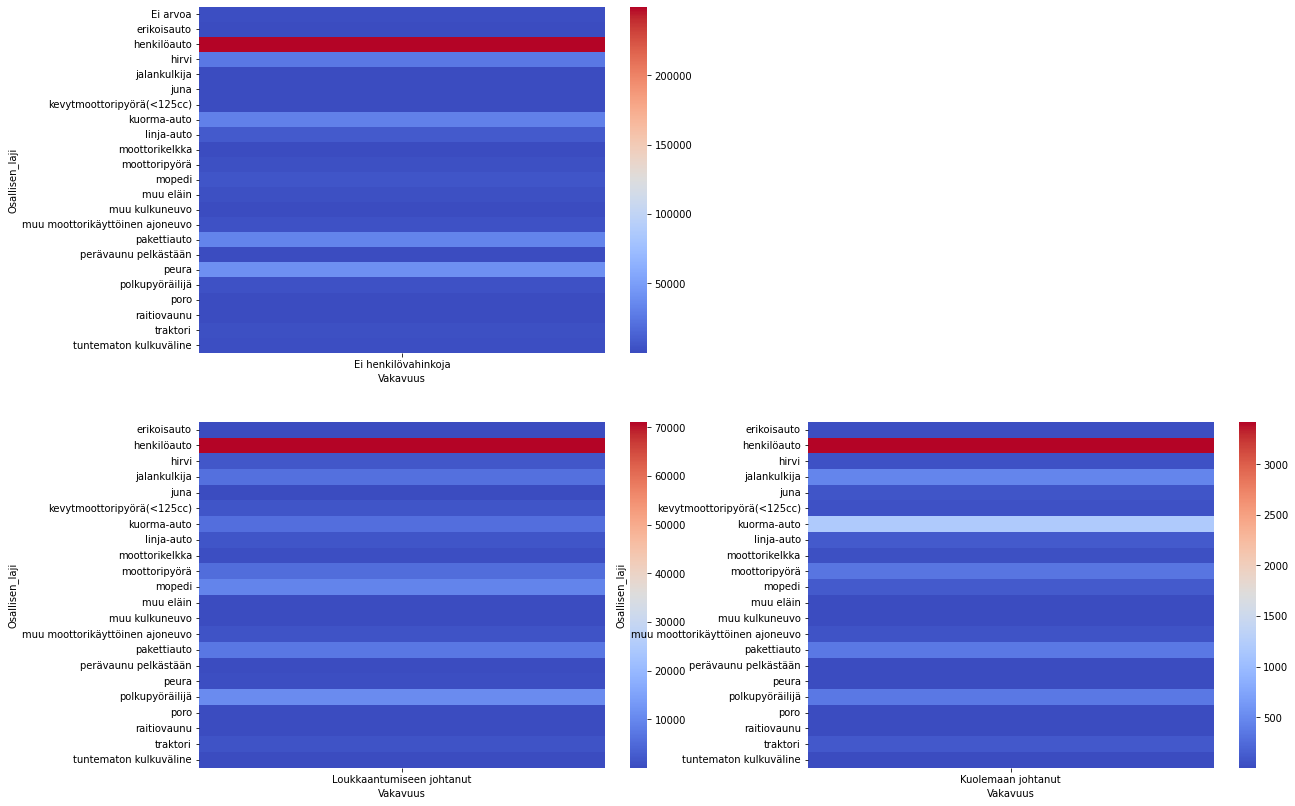

In [88]:
df_map1 = df_map[df_map['Vakavuus'] == 'Ei henkilövahinkoja']
df_map2 = df_map[df_map['Vakavuus'] == 'Loukkaantumiseen johtanut']
df_map3 = df_map[df_map['Vakavuus'] == 'Kuolemaan johtanut']

fig, ax = plt.subplots(figsize=(20,14))
plt.subplot(2,2,1)
ax=sns.heatmap(pd.crosstab(df_map1.Osallisen_laji, df_map1.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,3)
ax=sns.heatmap(pd.crosstab(df_map2.Osallisen_laji, df_map2.Vakavuus), annot=False, cmap="coolwarm")

plt.subplot(2,2,4)
ax=sns.heatmap(pd.crosstab(df_map3.Osallisen_laji, df_map3.Vakavuus), annot=False, cmap="coolwarm")

plt.show()